# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Monthly Mean Temperature

Sofia Velasquez 22049

José Marchena 22398

### 0. Obtencion de datos

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
mean_temp = pd.read_csv(
    './data/monthly-mean-temp.csv', 
    parse_dates=['Month'], 
    index_col='Month',
    date_parser=dateparse
)
print(mean_temp.shape)


(240, 1)


C:\Users\JM\AppData\Local\Temp\ipykernel_15368\3828989619.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  mean_temp = pd.read_csv(


### 1. Analisis Exploratorio

Description
       Temperature
count   240.000000
mean     49.041250
std       8.569705
min      31.300000
25%      41.550000
50%      47.350000
75%      57.000000
max      66.500000
Frequency distribution


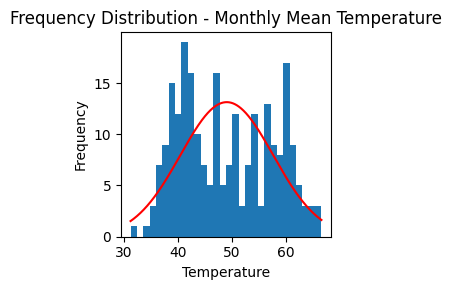

Time Series


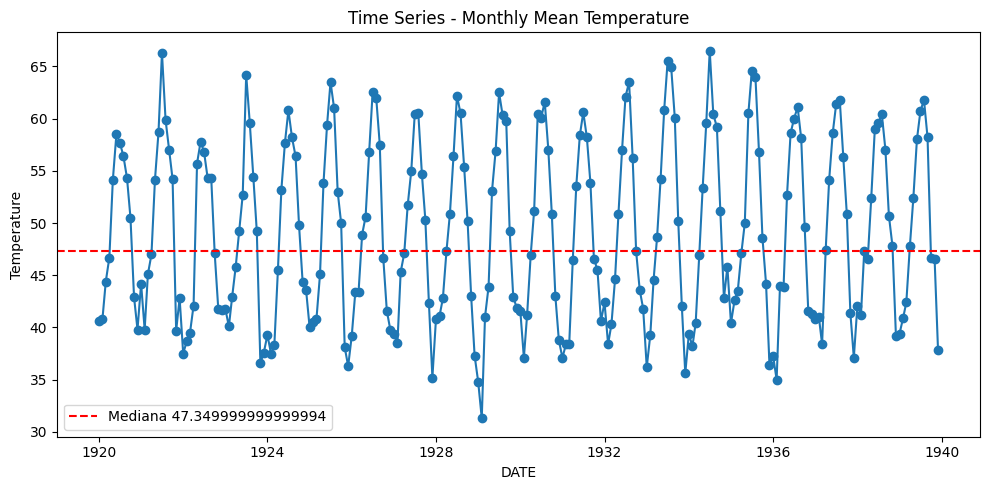

Seasonal Decompose


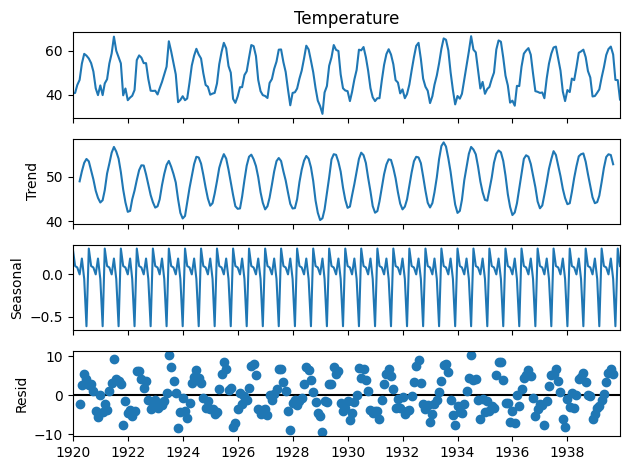

In [6]:
from scripts import analysis_graphs

value = "Temperature"
title = "Monthly Mean Temperature"

analysis_graphs(
    mean_temp,
    value,
    title
)

### 2. Moving Average

ACF plot


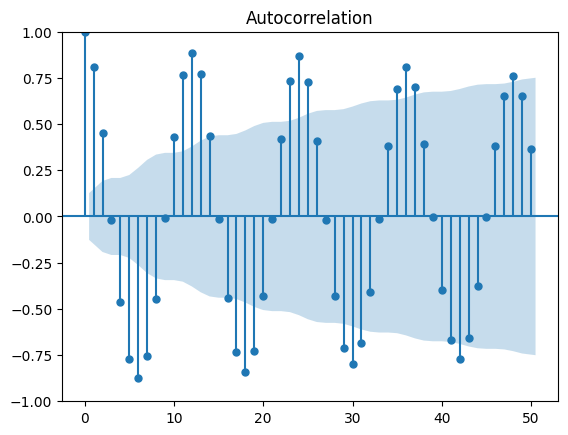

Finding Best Period
Best Lag is 11 with weight of 0.8841860709388742
Moving Average Graph


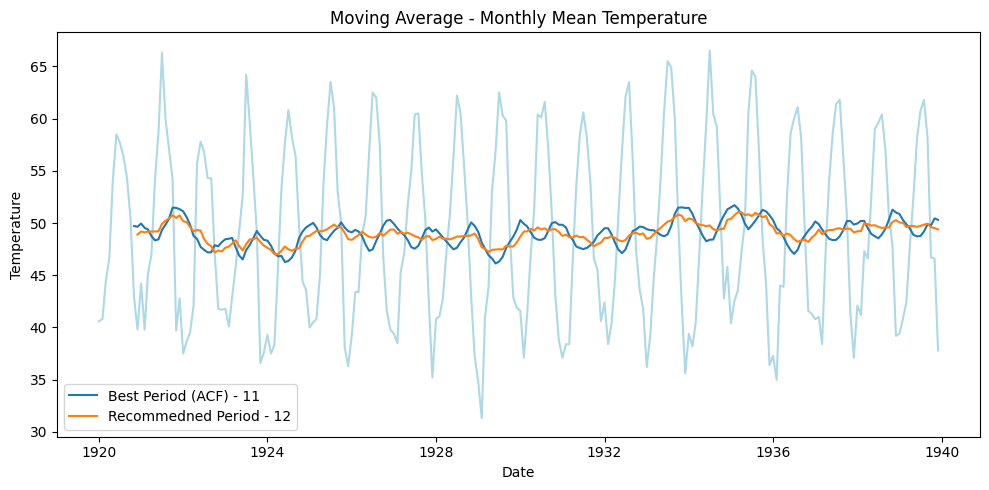

In [7]:
from scripts import moving_average

moving_average(mean_temp, value, title, 12)